<a href="https://colab.research.google.com/github/saeedahmadicp/Machine-Learning/blob/main/Drinking_water_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Methodoloy** 

In this code file, we have applied the following methodoly; 

1) First of all we have imported the necessary libraries required for the project

2) We have then imported the dataset, which we have downloaded manually from the kaggle website: https://www.kaggle.com/balavashan/drinking-water-dataset?select=Drinking_water.csv

3) We have done some preprocessing to our dataset 

4) We have then split the dataset to train and test data through two different statistics methods i.e. random sampling and stratified sampling 

5) then we have train our model

6) finally then we have evalute the model 

**Part A: importing the libraries**


In this part we have imported all the necessary packages required for our model

In [ ]:
#first of all we will import the libraries we need for this project

#pandas will be used for loading and preprocessing of the dataset
import pandas as pd

#numpy will be also used for the preprocessing of the dataset 
import numpy as np

#from the sklearn.ensemble we imported the Random Forest classifier, which we will use for our dataset classification
from sklearn.ensemble import RandomForestClassifier

#other classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#the seaborn and matplotlib libraries will be used for visualizing the datasets 
import seaborn as sns
import matplotlib.pyplot as plt

#the metrics modules will be used for evaluting the model
from sklearn import metrics

#module for spliting the test and train data
from sklearn.model_selection import train_test_split

#modules for data(i.e. features) standardization
from sklearn.preprocessing import StandardScaler

#ExtraTreesClassifer for the features engineering
from sklearn.ensemble import ExtraTreesClassifier


**Part B: Loading the dataset**

In [ ]:
#path of the dataset
path = "Drinking_water.csv"

In [ ]:
#loading the dataset
data = pd.read_csv(path)

**Part C: Showing some statistics of the dataset**

In [ ]:
#printing the shape of the data
data.shape

(3276, 13)

In [ ]:
#printing the head (top five values) of the dataset
data.head()

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Carcinogenics,medical_waste
0,0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,NaN,NaN
1,1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,NaN,NaN
2,2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,NaN,NaN
3,3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0,NaN,NaN
4,4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,NaN,NaN


In [ ]:
#printing the name of the columns present in the dataset
data.columns

Index(['Unnamed: 0', 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity',
       'Potability', 'Carcinogenics', 'medical_waste'],
      dtype='object')

In [ ]:
#counting the values of each specie in the dataset
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
#printing information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3276 non-null   int64  
 1   ph               2785 non-null   float64
 2   Hardness         3276 non-null   float64
 3   Solids           3276 non-null   float64
 4   Chloramines      3276 non-null   float64
 5   Sulfate          2495 non-null   float64
 6   Conductivity     3276 non-null   float64
 7   Organic_carbon   3276 non-null   float64
 8   Trihalomethanes  3114 non-null   float64
 9   Turbidity        3276 non-null   float64
 10  Potability       3276 non-null   int64  
 11  Carcinogenics    0 non-null      float64
 12  medical_waste    0 non-null      float64
dtypes: float64(11), int64(2)
memory usage: 332.8 KB


In [ ]:
#looking for null values 
data.isnull().sum()

Unnamed: 0            0
ph                  491
Hardness              0
Solids                0
Chloramines           0
Sulfate             781
Conductivity          0
Organic_carbon        0
Trihalomethanes     162
Turbidity             0
Potability            0
Carcinogenics      3276
medical_waste      3276
dtype: int64

**Data Cleaning**

In this step, I have removed the unnecessay columns and filled the null values of each column with their mean value

In [ ]:
#removing the unnmamed columns which contains just indexing of each row, so no need for it
data = data.drop(['Unnamed: 0'], axis=1)

In [ ]:
#removing the unneccesary columns,
# as our dataset contain two columns having all values not an integer(NAN), so I will removed it:
data = data.drop(['Carcinogenics', 'medical_waste'], axis=1)

**Filling the null values**

There are three columns in our dataset, having some of their values as null, so we have to fill it. So I am going to fill it with the mean value of respective column

In [ ]:
#spliting the data class-wise
data_list = []
classes = 2

#initializing the dataframes
for index in range(classes):
  data_list.append(pd.DataFrame(columns= data.columns))

for index in range(len(data['Potability'])):
  for class_label in range(classes):
    if(data.iloc[index]['Potability'] == class_label):
      data_list[class_label] = data_list[class_label].append(data.iloc[index], ignore_index=True)

for index in range(classes):
  data_list[index] = data_list[index].fillna(value = data_list[index]['ph'].mean())
  data_list[index] = data_list[index].fillna(value = data_list[index]['Sulfate'].mean())
  data_list[index] = data_list[index].fillna(value = data_list[index]['Trihalomethanes'].mean())


data = pd.concat(data_list, ignore_index=True)

In [ ]:
#now verifying that there are now no null values
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
#summerizing the statistics of the dataset
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080855,196.369496,22014.092526,7.122277,255.891589,426.205111,14.284970,63.463141,3.966786,0.390110
std,1.469958,32.879761,8768.570828,1.583085,143.842323,80.824064,3.308162,20.349834,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,7.073783,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,240.722848,365.734414,12.065801,53.793688,3.439711,0.000000
50%,7.085378,196.967627,20927.833605,7.130299,318.660382,421.884968,14.218338,65.445962,3.955028,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,481.792305,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Part C: Data Preprocessing**

we are also apply some methods for the data standardizations, so that our model may train betterly


**Standardizing the Data with Standard Scaler Transformation**

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [ ]:
X = data.drop('Potability', axis=1)
y = data['Potability']

#data standardization
standardized = StandardScaler()
standardized.fit(X)
X_transformed = standardized.transform(X)

**Part D: Feature Engineering**

In this portion I am showing the importance of each feature with respect to each feature through different techniques such as correlation matrix etc

**Correlation Matrix**

A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.

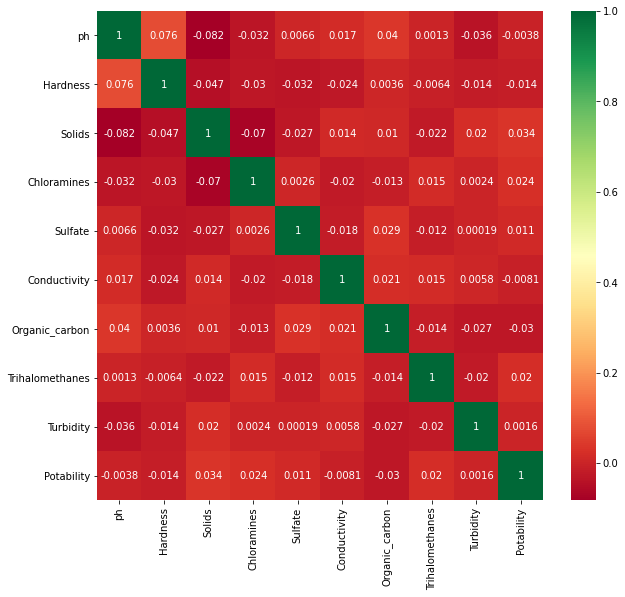

In [ ]:
#get correlations of each features in dataset

correlationMatrix = data.corr()
top_corr_features  = correlationMatrix.index
plt.figure(figsize=(10,9))

#plot heat map
graph = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

**Feature Importance through ExtraTreesClassifer**

In this method we using the ExtraTreesClassifier, for getting the importances of each features from the train model and we then showing it graphicaly. the greater the value of the features, the more important it is toward the output variables i.e. the species of the iris flower

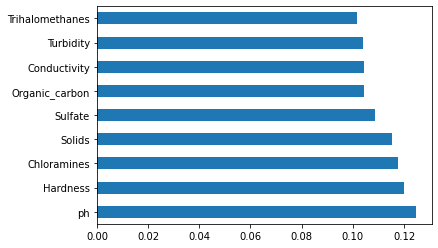

In [ ]:
#ExtraTreeClassifier for showing the importance of each feature
X = data.drop('Potability', axis=1)
y = data['Potability']

model = ExtraTreesClassifier()
model.fit(X,y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(9).plot(kind='barh')
plt.show()

**Splitting the Data (Random Sampling)**

Random sampling is one of the simplest forms of collecting data from the total population. Under random sampling, each member of the subset carries an equal opportunity of being chosen as a part of the sampling process. 

When dealing with the classification problem, there is always a chance of occuring bias in ramdom sampling the data, i.e. there may occur more instances of one class in the trianing data and less the testing data and vice versa. so in this case neither the model will be betterly trained nor the results will be accurate.

In [ ]:
#spliting the data (random resampling)
 
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y, random_state=12, test_size=0.20)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

**Training and testing the model with random Forest Classifier**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

the base estimator used in the random forest classifier is Decision Tree classifier. In the below code, I have try different numbers of estimators i.e. base decision trees. I have tried from 1 decision tree upto 201 with the step of 20.

I have then calculated all their accuracies and present their result graphically:

In [ ]:
#defining the list for using different number of base estimators for the random forest classifier
#the list will be start from 1 and will goes upto 202 with the step size of 20
numberOfClassifiers = list(range(1,202,20))

#lists for collecting the training and testing  accuracies for each of the classifier 
train_accuracies = []
test_accuracies = []

#training and testing random forest classifiers with different number of base estimators
for index in range(len(numberOfClassifiers)):
  #defining the model
  classifier = RandomForestClassifier(n_estimators= numberOfClassifiers[index])
  
  #fiting the model
  classifier.fit(X_train, y_train)

  #predicting the score for the test and train data
  y_pred_train = classifier.predict(X_train)
  y_pred_test = classifier.predict(X_test)

  
  #calculating the accuracies
  train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
  test_accuracy  = metrics.accuracy_score(y_test, y_pred_test)

  #appeding the values for the accuracies 
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)
   
  print("Regression Forest Successfully trained with number of base estimators: ", numberOfClassifiers[index])

  print("Training Accuracy: ", train_accuracy)
  print("Testing Accuracy: ", test_accuracy)

  print()
  print()
  print("************************")

Regression Forest Successfully trained with number of base estimators:  1
Training Accuracy:  0.8244274809160306
Testing Accuracy:  0.5594512195121951


************************
Regression Forest Successfully trained with number of base estimators:  21
Training Accuracy:  0.998854961832061
Testing Accuracy:  0.6265243902439024


************************
Regression Forest Successfully trained with number of base estimators:  41
Training Accuracy:  1.0
Testing Accuracy:  0.6859756097560976


************************
Regression Forest Successfully trained with number of base estimators:  61
Training Accuracy:  1.0
Testing Accuracy:  0.6585365853658537


************************
Regression Forest Successfully trained with number of base estimators:  81
Training Accuracy:  1.0
Testing Accuracy:  0.6371951219512195


************************
Regression Forest Successfully trained with number of base estimators:  101
Training Accuracy:  1.0
Testing Accuracy:  0.6448170731707317


************

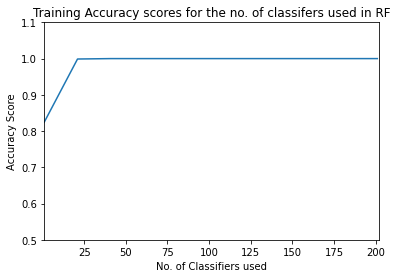

In [ ]:
#ploting the graphs with respect to the number of classifiers used in the randomforest tree
plt.plot(numberOfClassifiers, train_accuracies)
plt.title("Training Accuracy scores for the no. of classifers used in RF")
plt.xlabel("No. of Classifiers used")
plt.ylabel("Accuracy Score")
plt.xlim(1, 202)
plt.ylim(0.5, 1.1);
plt.show()

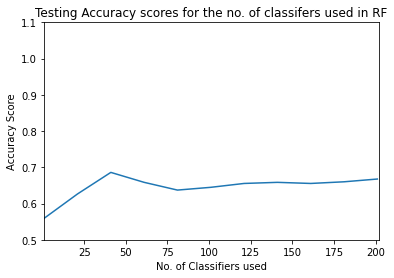

In [ ]:
#ploting the graphs with respect to the number of classifiers used in the randomforest tree
plt.plot(numberOfClassifiers, test_accuracies)
plt.title("Testing Accuracy scores for the no. of classifers used in RF")
plt.xlabel("No. of Classifiers used")
plt.ylabel("Accuracy Score")
plt.xlim(1, 202)
plt.ylim(0.5, 1.1);
plt.show()

**Training and testing with just one classifier**

In this block of code, I am just training and testing the model with just one classifier, as previously I have experiment with a lots of random forest classifier, for trying different number of base estimators. and the data I am using here as I random sampling.

In [ ]:
#fiting the model
classifier = RandomForestClassifier(n_estimators= 100)
classifier.fit(X_train, y_train)

#predicting the outputs
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

#calculating the accuracies
train_data_accuracy = metrics.accuracy_score(y_train, y_pred_train) 
test_data_accuracy =  metrics.accuracy_score(y_test, y_pred_test)

train_data_report = metrics.classification_report(y_train, y_pred_train)
test_data_report  = metrics.classification_report(y_test, y_pred_test)

print("Training Accuracy: ", train_data_accuracy)
print("Testing Accuracy: ", test_data_accuracy)

print("\nTraining Data Report: ")
print(train_data_report)


print("\nTesting Data Report: ")
print(test_data_report)

Training Accuracy:  1.0
Testing Accuracy:  0.6661585365853658

Training Data Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1588
           1       1.00      1.00      1.00      1032

    accuracy                           1.00      2620
   macro avg       1.00      1.00      1.00      2620
weighted avg       1.00      1.00      1.00      2620


Testing Data Report: 
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       410
           1       0.60      0.34      0.43       246

    accuracy                           0.67       656
   macro avg       0.64      0.60      0.60       656
weighted avg       0.65      0.67      0.64       656



****Splitting the Data (Strafied Sampling)****

The stratified sampling is used to eridicate the problem that occurs during the random sampling. In this method, first we divide the data into sub-groups based on their similar features and then from these sub-groups we then randomly select the samples, so the proportions of each sub-group or class remain the same.

In [ ]:
#spliting the data (stratified resampling)
data_list = []
classes = 2

#initializing the dataframes
for index in range(classes):
  data_list.append(pd.DataFrame(columns= data.columns))

for index in range(len(data['Potability'])):
  for class_label in range(classes):
    if(data.iloc[index]['Potability'] == class_label):
      data_list[class_label] = data_list[class_label].append(data.iloc[index], ignore_index=True)


X_train2 = []
X_test2 = []
y_train2 = []
y_test2 = []

for index in range(classes):
  dataSplit = train_test_split(data_list[index].drop('Potability', axis=1), data_list[index]['Potability'], random_state=12, test_size=0.20)
  X_train2.append(dataSplit[0])
  X_test2.append(dataSplit[1])
  y_train2.append(dataSplit[2])
  y_test2.append(dataSplit[3])


combined_X_train = pd.concat(X_train2 , ignore_index=True)
combined_X_test = pd.concat(X_test2 , ignore_index=True)
combined_y_train = pd.concat(y_train2 , ignore_index=True)
combined_y_test = pd.concat(y_test2 , ignore_index=True)



**Training and testing the model with random Forest Classifier**

I have used the same model as mentioned above. but this time only the data sampling is different i.e. stratified sampling 

In [ ]:

#defining the list for using different number of base estimators for the random forest classifier
#the list will be start from 1 and will goes upto 202 with the step size of 20
numberOfClassifiers = list(range(1,202,20))
train_accuracies = []
test_accuracies = []

#lists for collecting the training and testing  accuracies for each of the classifier
combined_y_train = combined_y_train.astype('int')
combined_y_test =  combined_y_test.astype('int')


#training and testing random forest classifiers with different number of base estimators
for index in range(len(numberOfClassifiers)):
  #defining the model
  classifier = RandomForestClassifier(n_estimators= numberOfClassifiers[index])
  
  #fiting the model
  classifier.fit(combined_X_train, combined_y_train)

  #predicting the score for the test and train data
  y_pred_train = classifier.predict(combined_X_train)
  y_pred_test = classifier.predict(combined_X_test)
  
  #calculating the accuracies
  train_accuracy = metrics.accuracy_score(combined_y_train, y_pred_train)
  test_accuracy  = metrics.accuracy_score(combined_y_test, y_pred_test)

  #appeding the values for the accuracies 
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

  print("Regression Forest Successfully trained with number of base estimators: ", numberOfClassifiers[index])

  print("Training Accuracy: ", train_accuracy)
  print("Testing Accuracy: ", test_accuracy)

  print()
  print()
  print("************************")

Regression Forest Successfully trained with number of base estimators:  1
Training Accuracy:  0.8309160305343511
Testing Accuracy:  0.5442073170731707


************************
Regression Forest Successfully trained with number of base estimators:  21
Training Accuracy:  0.998854961832061
Testing Accuracy:  0.6524390243902439


************************
Regression Forest Successfully trained with number of base estimators:  41
Training Accuracy:  1.0
Testing Accuracy:  0.6448170731707317


************************
Regression Forest Successfully trained with number of base estimators:  61
Training Accuracy:  1.0
Testing Accuracy:  0.6524390243902439


************************
Regression Forest Successfully trained with number of base estimators:  81
Training Accuracy:  1.0
Testing Accuracy:  0.6692073170731707


************************
Regression Forest Successfully trained with number of base estimators:  101
Training Accuracy:  1.0
Testing Accuracy:  0.6524390243902439


************

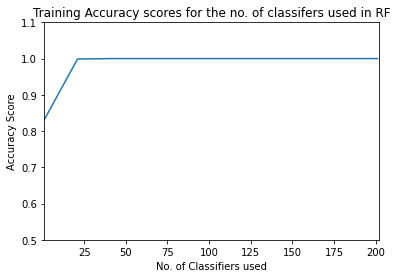

In [ ]:
#ploting the graphs with respect to the number of classifiers used in the randomforest tree
plt.plot(numberOfClassifiers, train_accuracies)
plt.title("Training Accuracy scores for the no. of classifers used in RF")
plt.xlabel("No. of Classifiers used")
plt.ylabel("Accuracy Score")
plt.xlim(1, 202)
plt.ylim(0.5, 1.1);
plt.show()

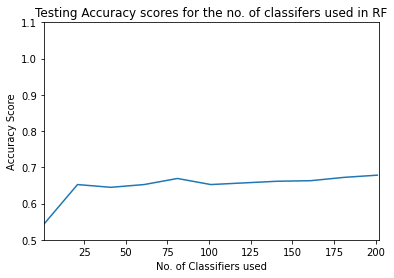

In [ ]:
#ploting the graphs with respect to the number of classifiers used in the randomforest tree
plt.plot(numberOfClassifiers, test_accuracies)
plt.title("Testing Accuracy scores for the no. of classifers used in RF")
plt.xlabel("No. of Classifiers used")
plt.ylabel("Accuracy Score")
plt.xlim(1, 202)
plt.ylim(0.5, 1.1);
plt.show()

**Training and testing with just one classifier**

In this block of code, I am just training and testing the model with just one classifier, as previously I have experiment with a lots of random forest classifier, for trying different number of base estimators and the data I am using here as I random sampling

In [ ]:
#fiting the model
classifier = RandomForestClassifier(n_estimators= 100)
classifier.fit(combined_X_train, combined_y_train)

#predicting the outputs
y_pred_train = classifier.predict(combined_X_train)
y_pred_test = classifier.predict(combined_X_test)

#calculating the accuracies
train_data_accuracy = metrics.accuracy_score(combined_y_train, y_pred_train) 
test_data_accuracy =  metrics.accuracy_score(combined_y_test, y_pred_test)

train_data_report = metrics.classification_report(combined_y_train, y_pred_train)
test_data_report  = metrics.classification_report(combined_y_test, y_pred_test)

print("Training Accuracy: ", train_data_accuracy)
print("Testing Accuracy: ", test_data_accuracy)

print("\nTraining Data Report: ")
print(train_data_report)


print("\nTesting Data Report: ")
print(test_data_report)

Training Accuracy:  1.0
Testing Accuracy:  0.6600609756097561

Training Data Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1598
           1       1.00      1.00      1.00      1022

    accuracy                           1.00      2620
   macro avg       1.00      1.00      1.00      2620
weighted avg       1.00      1.00      1.00      2620


Testing Data Report: 
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       400
           1       0.64      0.29      0.40       256

    accuracy                           0.66       656
   macro avg       0.65      0.59      0.58       656
weighted avg       0.66      0.66      0.62       656

